Sentiment analysis is a natural language processing (NLP) technique used to determine the sentiment of a piece of text, i.e., whether it is positive, negative, or neutral. It can be used to analyze a wide variety of text data, such as social media posts, customer reviews, and product descriptions.Sentiment analysis is particularly useful for US airline marketing, as it can be used to understand customer sentiment towards different airlines, identify areas for improvement, and develop more effective marketing campaigns.
Preprocessing is the first step in any sentiment analysis task. It involves
cleaning and normalizing the text data so that it can be easily processed by the sentiment analysis model.


# **Importing libraries for preprocessing**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import itertools
import collections
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**Loading the dataset**

In [2]:
df=pd.read_csv("Tweets.csv")

In [3]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [5]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


# **Data Preprocessing**

Preprocessing your data is a crucial step in sentiment analysis using NLP techniques. It helps clean and prepare the text data for analysis
This involves
1. Text lowercasing
2. Tokenization
3. Removing Punctuation
4. Stopword Removal
5. Data Cleaning
6. Vectorization
7. One hot Encoding

In [6]:
df.shape #shape of the dataset

(14640, 15)

In [7]:
#Finding the missing values in each column
df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [8]:
#total no of duplicated rows
df.duplicated().sum()

36

In [9]:
df['airline_sentiment'].unique()

array(['neutral', 'positive', 'negative'], dtype=object)

In [10]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

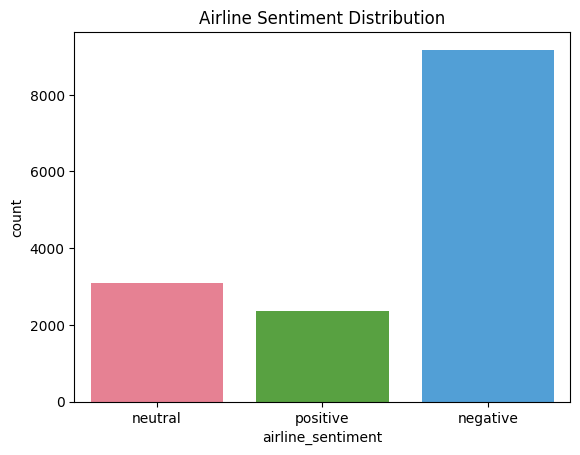

In [11]:
sns.countplot(data=df,x='airline_sentiment',palette="husl")
plt.title('Airline Sentiment Distribution')
plt.show()

In [12]:
data = df[['text', 'airline_sentiment']]

In [13]:
data['text'] = data['text'].apply(lambda x: x.lower())

<ipython-input-13-f3fceae1f5bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].apply(lambda x: x.lower())


In [14]:
def remove_stopwords(input_text):
    stopwords_list = stopwords.words('english')
    whitelist = ["n't", "not", "no"," "]
    words = input_text.split()
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1]
    return " ".join(clean_words)

In [15]:
def remove_mentions(input_text):
  return re.sub('([^\s\w]|_@?)+', '', input_text)

In [16]:

data.text = data.text.apply(remove_stopwords).apply(remove_mentions)


<ipython-input-16-b3d5cc4b12aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.text = data.text.apply(remove_stopwords).apply(remove_mentions)


In [17]:
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['text']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)

    return corpus

corpus = build_corpus(data)

<ipython-input-17-c67ee5010eda>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for sentence in data[col].iteritems():


In [18]:
list_of_corpus = list(itertools.chain(*corpus))
counts_of_words = collections.Counter(list_of_corpus)
counts_of_words.most_common(10)
clean_tweets = pd.DataFrame(counts_of_words.most_common(10),
                             columns=['words', 'count'])
clean_tweets.head()

,words,count
0,united,4143
1,flight,3873
2,usairways,3051
3,americanair,2957
4,southwestair,2452


**One hot encoding**

One hot encoding is a technique that we use to represent categorical variables as numerical values in this model.

In [19]:
data_vocab = []
for text in data.text:
    for word in text:
        if word not in data_vocab:
            data_vocab.append(word)

In [20]:
def get_onehot_representation(text, vocab = data_vocab):
    onehot_encoded = []
    for word in text:
        temp = [0]*len(vocab)
        temp[vocab.index(word)-1] = 1
        onehot_encoded.append(temp)
    return onehot_encoded

**Train Test split**

Training set: This subset is used to train the model. The model learns from the training data and adjusts its parameters to minimize the error on the training set.
Test set: This subset is not used to train the model. Instead, it is used to evaluate the performance of the trained model on unseen data.

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.text, df.airline_sentiment, test_size=0.1, random_state=np.random.seed(78))